<a href="https://colab.research.google.com/github/SuryanshYagnik/git-hub-project/blob/main/Sentimental_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **In this Assignment you will perform sentiment analysis on twitter's dataset using Logistic Regression**

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing

#For Preprocessing
import re    # RegEx for removing non-letter characters
import nltk  #natural language processing
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem.porter import *


#import any necessary packages if required
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, accuracy_score

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## **Load Tweet dataset download from https://www.kaggle.com/datasets/saurabhshahane/twitter-sentiment-dataset**

In [ ]:
#fill code
df = pd.read_csv("/content/Twitter_Data.csv")
print(df.head())
#Output the first five rows

#fill code

                                          clean_text  category
0  when modi promised “minimum government maximum...      -1.0
1  talk all the nonsense and continue all the dra...       0.0
2  what did just say vote for modi  welcome bjp t...       1.0
3  asking his supporters prefix chowkidar their n...       1.0
4  answer who among these the most powerful world...       1.0


<Axes: xlabel='category'>

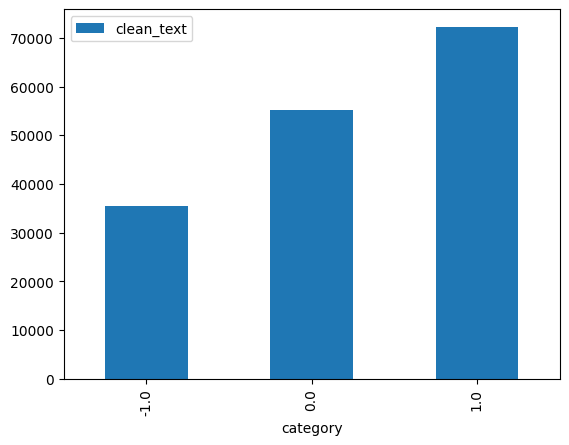

In [ ]:
# The distribution of sentiments
df.groupby('category').count().plot(kind='bar')

In [ ]:
# Map tweet categories
df['category'] = df['category'].map({-1.0:'Negative', 0.0:'Neutral', 1.0:'Positive'})

# **Visualizing data into wordclouds**

<Axes: xlabel='category'>

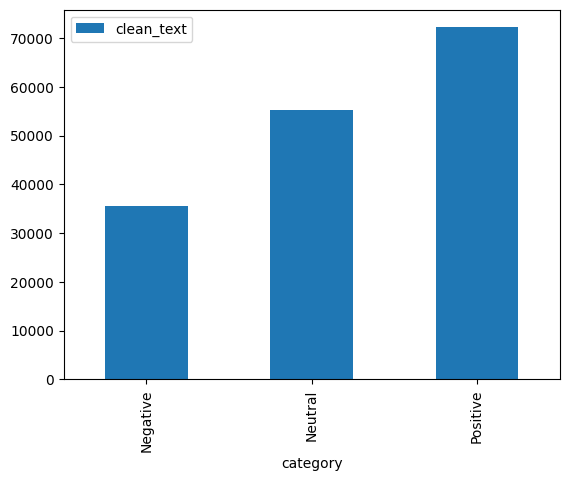

In [ ]:
from wordcloud import WordCloud, STOPWORDS

#write code to generate the worldcloud

def wordcount_gen(df, category):
    '''
    Generating Word Cloud
    inputs:
       - df: tweets dataset
       - category: Positive/Negative/Neutral
    '''
    # Filter tweets for the given category
    category_tweets = df[df['category'] == category]['clean_text']

    # Concatenate all the tweets into a single string
    all_tweets = ' '.join(category_tweets)

    # Check if there are tweets associated with the category
    if not all_tweets:
        print(f"No tweets found for the category {category}.")
    else:
        # Generate a Word Cloud
        stopwords = set(STOPWORDS)
        wordcloud = WordCloud(stopwords=stopwords, background_color='white', width=800, height=400).generate(all_tweets)

        # Plot the Word Cloud
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'Word Cloud for {category} Tweets', fontsize=16)
        plt.show()

# Plot the distribution of sentiments
df.groupby('category').count().plot(kind='bar')


In [ ]:
#Generate Positive tweet words cloud
#fill code
wordcount_gen(df, 1.0)

No tweets found for the category 1.0.


In [ ]:
#Generate Negative tweet words cloud
#fill code
wordcount_gen(df, -1.0)


No tweets found for the category -1.0.


In [ ]:
#Generate Neutral tweet words cloud

#fill code
wordcount_gen(df, 0.0)

No tweets found for the category 0.0.


# **Cleaning the tweets using RegEx and NLTK**

In [ ]:
#fill code to return the cleaned tweet using RegEx and NLTK
def tweet_to_words(tweet):
    ''' Convert tweet text into a sequence of words '''
    # Remove non-letter characters using RegEx and convert to lowercase
    tweet = re.sub("[^a-zA-Z]", " ", tweet).lower()

    # Tokenize the text into words
    words = tweet.split()

    # Remove stopwords using NLTK
    stop_words = set(stopwords.words("english"))
    words = [word for word in words if word not in stop_words]

    # Perform stemming using NLTK
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]

    # Join the processed words back into a string
    processed_tweet = " ".join(words)
    return processed_tweet

# Test the function
print("\nOriginal tweet ->", df['clean_text'][0])
print("\nProcessed tweet ->", tweet_to_words(df['clean_text'][0]))


Original tweet -> when modi promised “minimum government maximum governance” expected him begin the difficult job reforming the state why does take years get justice state should and not business and should exit psus and temples

Processed tweet -> modi promis minimum govern maximum govern expect begin difficult job reform state take year get justic state busi exit psu templ


In [ ]:
# Apply data processing to each tweet
from sklearn.preprocessing import LabelEncoder
# Fill missing values (NaN) in the 'clean_text' column with an empty string
df['clean_text'].fillna('', inplace=True)

# Encode target labels using scikit learn
label_encoder = LabelEncoder()
df['category_encoded'] = label_encoder.fit_transform(df['category'])

# Output the first five rows with cleaned text and encoded category
print(df[['clean_text', 'category', 'category_encoded']].head())

#fill code




                                          clean_text  category  \
0  when modi promised “minimum government maximum...  Negative   
1  talk all the nonsense and continue all the dra...   Neutral   
2  what did just say vote for modi  welcome bjp t...  Positive   
3  asking his supporters prefix chowkidar their n...  Positive   
4  answer who among these the most powerful world...  Positive   

   category_encoded  
0                 0  
1                 1  
2                 2  
3                 2  
4                 2  


In [ ]:
#train test splitting using scikit learn
y = pd.get_dummies(df['category'])
#fill code
# Split the data into features (X) and target (y)
X = df['clean_text']
y = df['category_encoded']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Output the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (130384,)
X_test shape: (32596,)
y_train shape: (130384,)
y_test shape: (32596,)


#**Train Test Split for training the Regression model**

In [ ]:
#Transform the training and testing data using countvectorizer

#fill code
# Create an instance of CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the training data
X_train_vectorized = vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_vectorized = vectorizer.transform(X_test)

# Output the shape of the vectorized data
print("X_train_vectorized shape:", X_train_vectorized.shape)
print("X_test_vectorized shape:", X_test_vectorized.shape)





#fill code





X_train_vectorized shape: (130384, 92855)
X_test_vectorized shape: (32596, 92855)


In [ ]:
#train multivariate logistic regression on the data using scikit learn

#fill code
# Create an instance of LogisticRegression
logreg_model = LogisticRegression()

# Fit the model to the training data
logreg_model.fit(X_train_vectorized, y_train)

# Predict on the testing data
y_pred = logreg_model.predict(X_test_vectorized)

# Output the accuracy of the model
accuracy = (y_pred == y_test).mean()
print("Accuracy:", accuracy)





#fill code







Accuracy: 0.9455761443121855


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#predict using your model on the testing dataset

#fill code
print("Predicted values:", y_pred)





#fill code



Predicted values: [1 1 2 ... 2 0 1]


# **Analysing the Results**

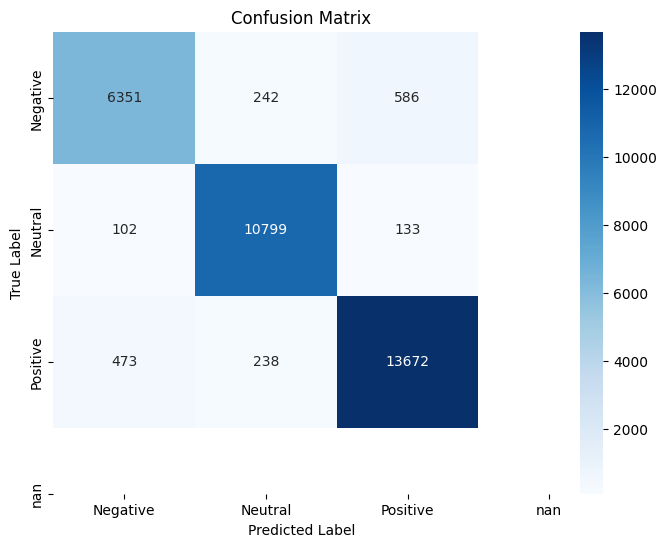

In [ ]:
#Calculate and plot the Confusion matrix

conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
#fill code







#fill code



In [ ]:
#calculate the precision , recall and accuracy using scikit learn

#fill code
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)







#fill code





Precision: 0.945263896287228
Recall: 0.9455761443121855
Accuracy: 0.9455761443121855


Hope You Learnt the techniques for sentiment analysis , remember this is just the tip of the iceberg, there is alot to learn.. so keep learning... keep growing :) .